In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
!wget --no-check-certificate -O credit_risk_dataset.csv 'https://drive.google.com/uc?export=download&id=1bxuS3fVpoYzbKyOjPjqhuTTfbYD2oOSh'

--2024-10-17 15:58:25--  https://drive.google.com/uc?export=download&id=1bxuS3fVpoYzbKyOjPjqhuTTfbYD2oOSh
Resolving drive.google.com (drive.google.com)... 173.194.210.138, 173.194.210.139, 173.194.210.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bxuS3fVpoYzbKyOjPjqhuTTfbYD2oOSh&export=download [following]
--2024-10-17 15:58:25--  https://drive.usercontent.google.com/download?id=1bxuS3fVpoYzbKyOjPjqhuTTfbYD2oOSh&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1804682 (1.7M) [application/octet-stream]
Saving to: ‘credit_risk_dataset.csv’

credit_risk_dataset 100%[===================>]   

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.loan_status.value_counts()

,count
loan_status,
0,25473
1,7108


In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [9]:
df.nunique()

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


### remove duplcate rows

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(32416, 12)

In [12]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


### Remove null rows

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [15]:
df.shape

(28501, 12)

## Visualization

In [16]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


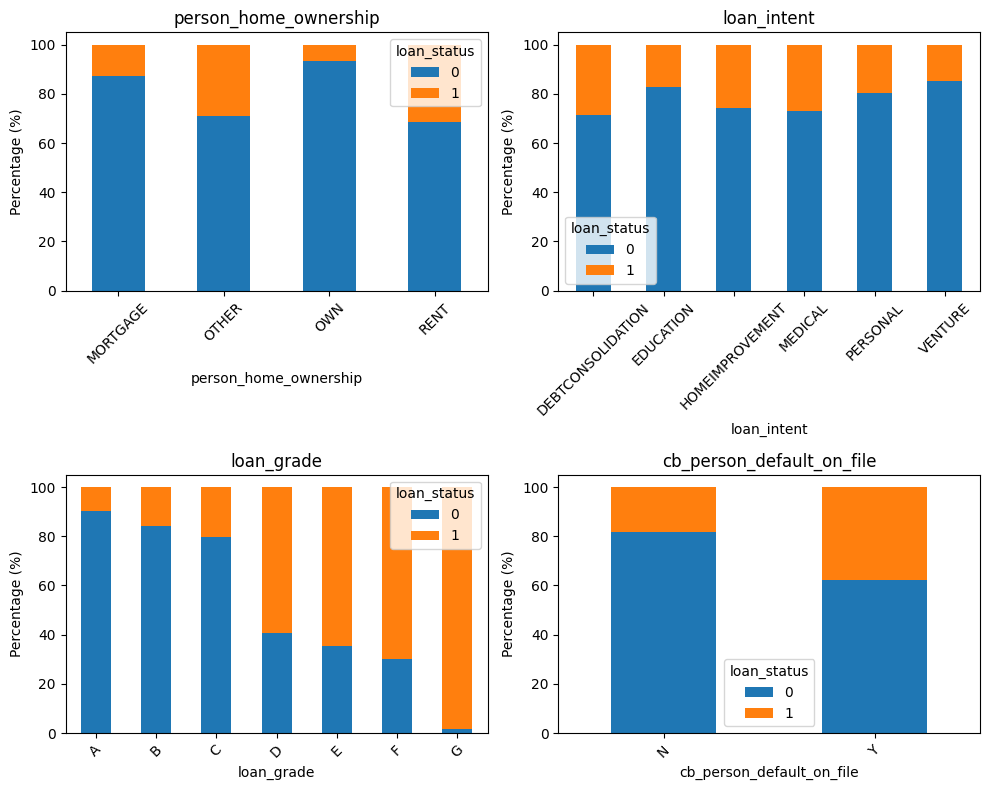

In [17]:
df_plot = df.copy()
# Function to calculate the percentage
def plot_percentage(data, col, ax):
    total = data.groupby([col, 'loan_status']).size().unstack()
    percentage = total.div(total.sum(1), axis=0) * 100  # Convert to percentage
    percentage.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Percentage (%)')
    ax.set_title(col)

# Create a 2x2 grid for visualizing categorical columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# List of categorical columns to visualize
columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column as percentage
for i, col in enumerate(columns):
    plot_percentage(df_plot, col, axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

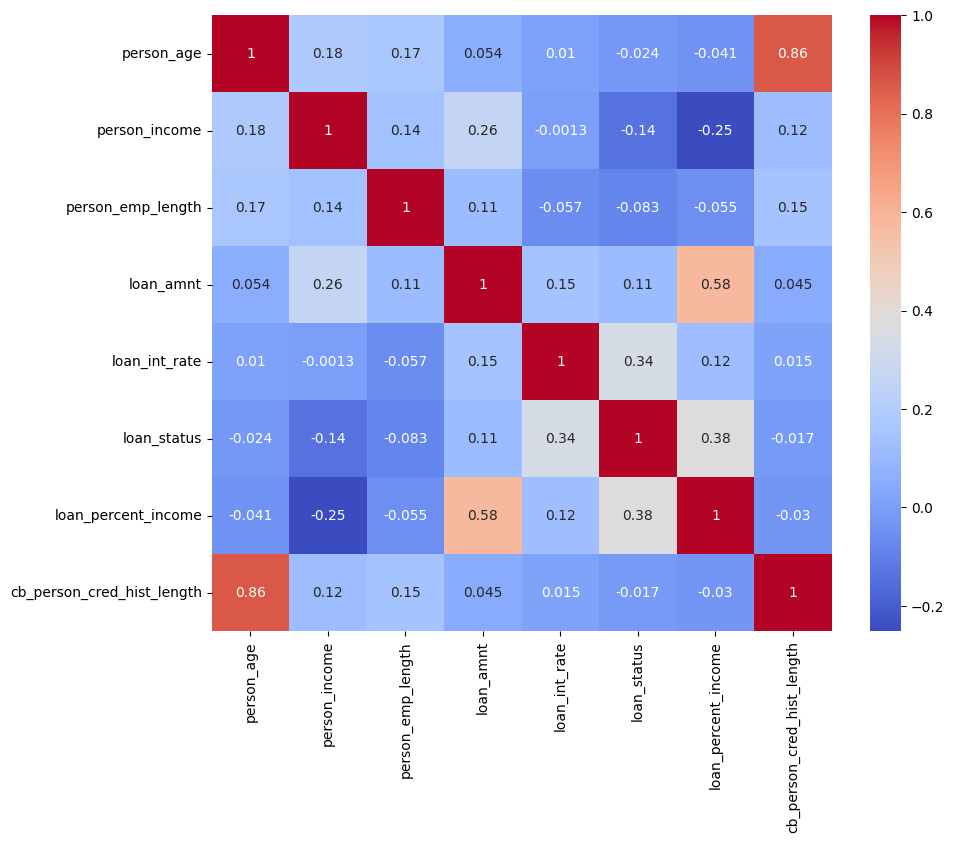

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

## Model Development and Evaluation

In [19]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)
# df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)
dummy_columns = df.columns
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,False,False,...,False,True,False,True,False,False,False,False,False,False


In [20]:
# Split the data into features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']#
# Standardize the feature columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [22]:
X_train[numerical_cols]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
30943,2.088132,0.066673,1.718158,1.751359,0.356331,1.220866,1.282826
23888,-0.120463,-0.105007,0.288693,-0.454093,1.525517,-0.561360,0.294978
6512,-0.909246,-0.410216,-1.140771,-0.580119,0.671826,-0.373757,-0.445907
6054,-0.435976,-0.352989,0.288693,-1.021209,-1.258259,-0.936566,-0.939830
3517,-0.909246,-0.469350,-0.426039,0.128777,-0.794296,0.751859,-0.939830
...,...,...,...,...,...,...,...
24660,0.983835,0.162051,0.288693,-0.265054,-1.743873,-0.561360,1.035864
6202,-0.751490,-0.753576,0.288693,-0.580119,0.186212,0.470455,-0.692869
991,-0.909246,-0.810803,-0.902527,-0.580119,0.501706,0.751859,-0.445907
18074,0.352808,2.260364,0.765181,0.837672,-0.021025,-0.842764,0.294978


In [23]:
# List of models
models = {
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [24]:
# Train and evaluate each model
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)

[LightGBM] [Info] Number of positive: 4928, number of negative: 17872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 22800, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216140 -> initscore=-1.288302
[LightGBM] [Info] Start training from score -1.288302
                        Accuracy  Precision    Recall  F1 Score   ROC AUC
Support Vector Machine  0.910191   0.931871  0.640476  0.759172  0.891100
Decision Tree           0.884932   0.738924  0.741270  0.740095  0.833481
Logistic Regression     0.867041   0.792541  0.539683  0.642115  0.870168
Random Forest           0.928784   0.957173  0.709524  0.814950  0.928941
XGBoost                 0.930714   0.943590  0.730159  0.823266  0.943839
